#### **1. 导入模块**

导入 Python 标准库、第三方库和本项目自定义库

In [1]:
# 标准库
import os
import sys

# 第三方库
# pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# 将上级目录加入系统路径
# 以便导入项目自定义库
sys.path.append(os.path.abspath('..'))

# 自定义库
from src.analyzer.semantic_feature_analysis import SemanticFeatureAnalyzer

#### **2. 读取数据**

读取包含语义标注的多版本平行语料库

In [2]:
# 指定文件路径 data/output/2_semantic_annotation.jsonl
# 文件为 JSON 格式
# 包含多版本译文的语义赋码

data_file = '../data/output/3_semantic_annotation.jsonl'
print(f"从 {os.path.abspath(data_file)} 文件读取数据 ...")

# 读取数据 
analyzer = SemanticFeatureAnalyzer(data_file)
analyzer.load_and_count()
print(f"读取完成！包含下列版本：{analyzer.versions}")

从 C:\llm_corpus_annotation_v3\data\output\3_semantic_annotation.jsonl 文件读取数据 ...
读取完成！包含下列版本：{'deepseek-v3.2', 'qwen3-max', 'human'}


#### **3. 分析数据**

统计各版本译文中的语义赋码分布

In [3]:
# 指定 USAS 语义类别
# USAS 赋码集详见：
# https://ucrel.lancs.ac.uk/usas/
tag_config = {
    "情绪化行动/状态/过程": ["E"],
    "社会行动/状态/过程": ["S"],
    "移动/位置/运输": ["M"],
    "心理行动/状态/过程": ["X"],
}

# 统计指定类别占比
df_usas = analyzer.get_feature_report(
    target_tags=tag_config,
)

# 预览统计结果
df_usas.head()

,Version,Feature Label,Count,Percentage
0,deepseek-v3.2,情绪化行动/状态/过程,162,2.515919
1,deepseek-v3.2,社会行动/状态/过程,428,6.646995
2,deepseek-v3.2,移动/位置/运输,354,5.497748
3,deepseek-v3.2,心理行动/状态/过程,263,4.084485
4,qwen3-max,情绪化行动/状态/过程,164,2.551338


#### **4. 绘制图表**

绘制柱状图，展示各译本中的语义法特征分布

In [4]:
# 设置绘图风格
font_name = 'Microsoft YaHei'
sns.set_theme(style="white", font=font_name) 

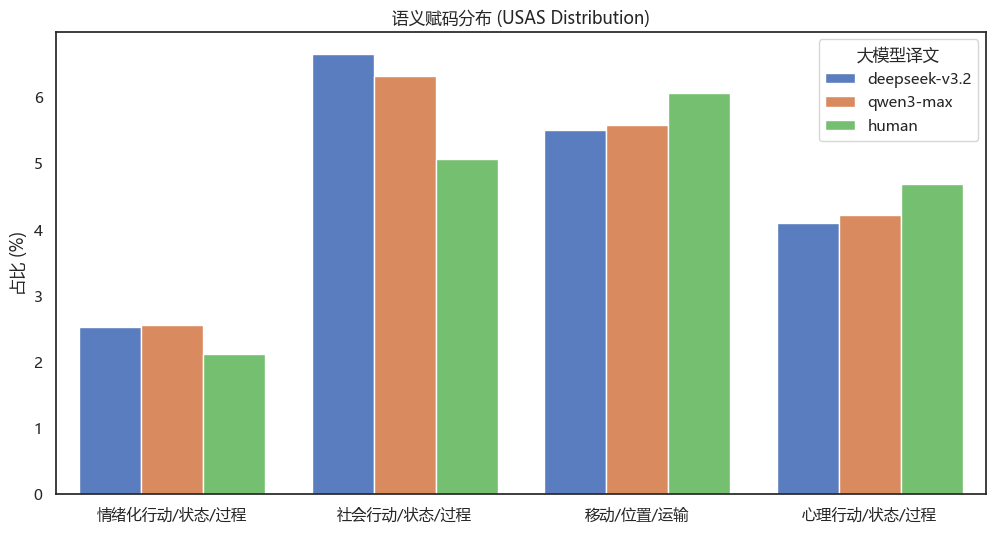

In [5]:
# --- 语义赋码分布 ---
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Label", y="Percentage", hue="Version", data=df_usas, palette="muted")
plt.title("语义赋码分布 (USAS Distribution)")
plt.xlabel("")
plt.ylabel("占比 (%)")
plt.legend(title="大模型译文")
plt.show()

#### **5. 提取例句**

提取机器译文和人工译文之间语义特征差异最大的例句

In [6]:
# 指定译文版本
# 版本 A (ver_a): 数量多
# 版本 B (ver_b): 数量少
ver_a = "deepseek-v3.2"
ver_b = "human"

# 指定具体语义类别
target_tag= "S"

In [7]:
# --- 提取语义特征差异最大的例句 ---

# 提取例句
examples = analyzer.get_examples(
    data_file,
    target_tag=target_tag, 
    ver_a=ver_a,   
    ver_b=ver_b,
)


# 打印例句
print(f"\n共找到 {len(examples)} 个典型案例")
analyzer.print_examples(examples, target_tag, ver_a, ver_b) 


共找到 31 个典型案例

=== S 类差异最大的例句 Top 3 ===

[1] ID: 000067 | Diff: +7
[source]: 吕留良心怀故国，不肯在清朝做官。 当地大吏仰慕他声名，保荐他为“山林隐逸”，应征赴朝为官，吕留良誓死相拒，大吏不敢再逼。
------------------------------------------------------------
[deepseek-v3.2] (Count: 11):
Text: Lü Liuliang, who remained loyal to the fallen Ming dynasty, refused to serve as an official under the Qing regime. The local high-ranking officials, admiring his reputation, recommended him as a "recluse of the mountains and forests" to be summoned to court for an official post. Lü Liuliang resisted with a vow to die rather than comply, and the officials dared not press him further.
Keywords: ['loyal(S1.2.5)', 'to serve(S8)', 'official(S7.1)', 'officials(S7.1)', 'reputation(S2)', '"recluse of the mountains and forests"(S2)', 'to be summoned(S7.1)', 'resisted(S8)', 'vow(S6)', 'officials(S7.1)', 'press(S8)']
------------------------------------------------------------
[human] (Count: 4):
Text: In spite of Lü Liuliang's patriotic unwillingness to serve, a loc